# Installations

In [1]:

%%capture
#Functions
from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import glob


import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile

colors = [ "#E69F00", "#56B4E9", "#009E73", "#CC79A7", "#999999","#F0E442","#0072B2", "#D55E00" ]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.7, 
              rc={"lines.linewidth": 1.8, 'axes.linewidth':2, 
                                  "xtick.major.width":2,"ytick.major.width":2}, 
              palette = palette)

In [2]:

def read_data(experimental_files, fitted_files):
    exp = []
    fit = []
    for exp_file, fit_file in zip(experimental_files, fitted_files):
        exp.append(pd.read_excel(exp_file))
        fit.append(pd.read_excel(fit_file))
    return exp, fit





In [4]:
%%capture
import Cyclic_peptide_no_E1 as cy

In [5]:
experimental_files = sorted(glob.glob("experimental*"))
fitted_files = sorted(glob.glob("simulated*"))

exp_data, fit_data = read_data(experimental_files, fitted_files)

In [6]:
def plot_reagent_data(df_list, y_list):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=False, sharex=True)

    reagents = ['F', 'Ac', 'E1', 'E2', 'E3']
    colors = sns.color_palette("Set1", 3)

    for d, y, c in zip(df_list, y_list, colors):

        for  r, ax in zip(reagents, axes):

            sns.scatterplot(data=d, x='time', y=r, ax=ax, color=c, alpha=0.75)
            sns.lineplot(data=y, x='min', y=r, ax=ax, alpha=0.5, color=c)
            ax.set(xlabel='Time [min]', ylabel=f'{r} [mM]', xticks=(0, 150, 300), xlim=(-20, 320))

    plt.tight_layout()
    return fig, axes


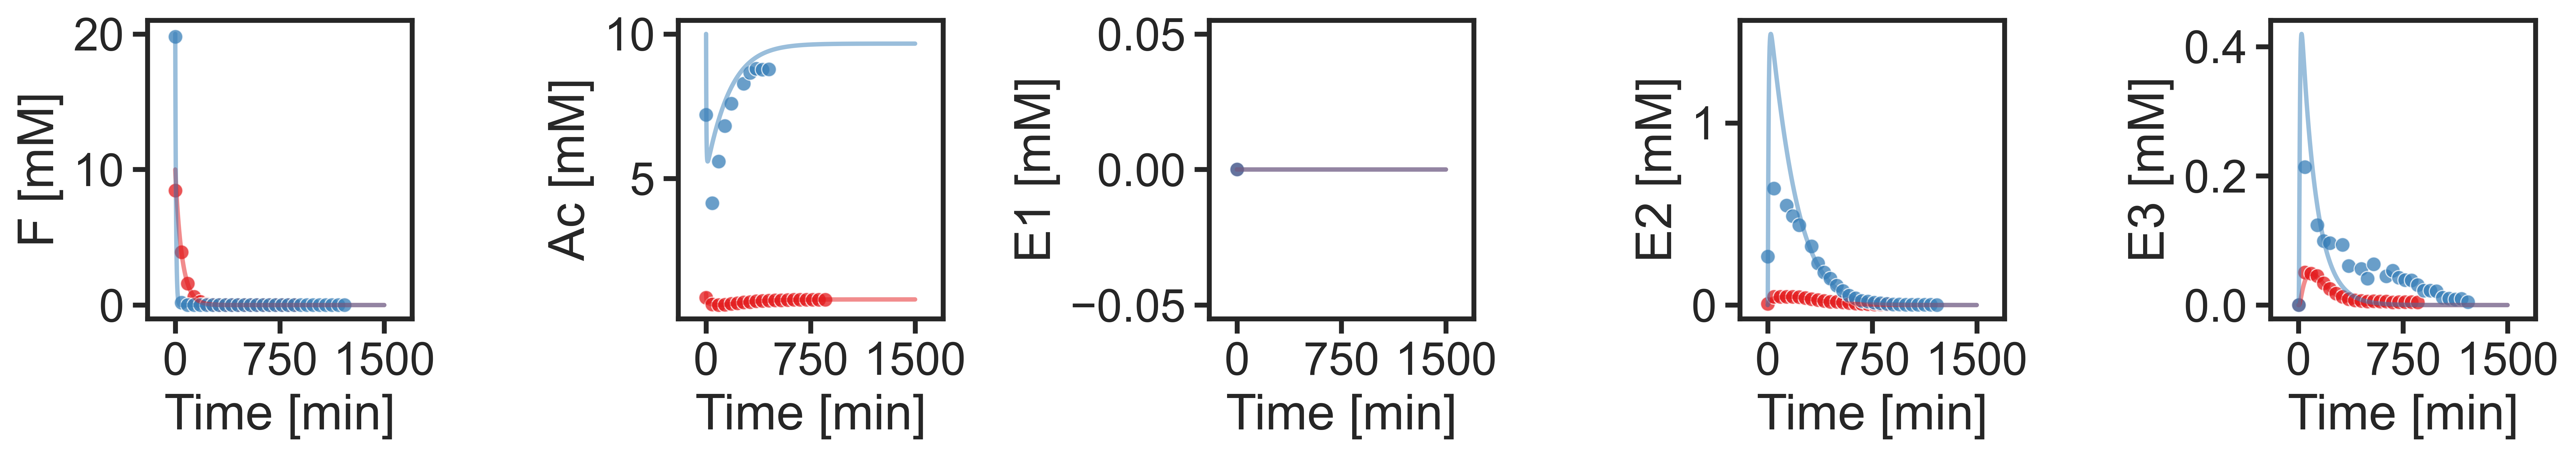

In [7]:
fig, ax = plot_reagent_data(exp_data, fit_data)
fig.dpi = 600

for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))